<a href="https://colab.research.google.com/github/priyanka-ingale/unstructured-intelligence/blob/main/CarsWord2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [11]:
# Load the car dataset
df_cars = pd.read_csv('IA1_2.csv')
display(df_cars)

,description,Maker_Model
0,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series M
1,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
2,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
3,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
4,"premium unleaded (required),MANUAL,rear wheel ...",BMW 1 Series
...,...,...
11909,"premium unleaded (required),AUTOMATIC,all whee...",Acura ZDX
11910,"premium unleaded (required),AUTOMATIC,all whee...",Acura ZDX
11911,"premium unleaded (required),AUTOMATIC,all whee...",Acura ZDX
11912,"premium unleaded (recommended),AUTOMATIC,all w...",Acura ZDX


In [3]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 91.4 MB/s eta 0:00:00


In [4]:
import gensim
from gensim.models import Word2Vec

# 1. Preparing data

In [5]:
# split the description tags into a list of strings [cite: 1, 2]
sentences = [desc.split(',') for desc in df_cars['description'].values]
print(f"Total sentences: {len(sentences)}")
print("Example sentence:", sentences[0])

Total sentences: 11914
Example sentence: ['premium unleaded (required)', 'MANUAL', 'rear wheel drive', 'Factory Tuner', 'Luxury', 'High-Performance', 'Compact', 'Coupe', 'BMW 1 Series M']


## 2. Run the model (with size = 50) and display the vector for ‘Toyota Camry’.

In [12]:
model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)
camry_vector = model.wv.__getitem__('Toyota Camry')
print("Vector for 'Toyota Camry':\n", camry_vector)

Vector for 'Toyota Camry':
 [-0.0426195   0.04275279  0.03065513 -0.04018644 -0.07796054 -0.07285077
  0.05103279  0.20322077 -0.05469089  0.01018857  0.06721792 -0.08469972
  0.06566643 -0.01004751 -0.06806081  0.02474357  0.1010867   0.09565507
 -0.10763954 -0.16362801  0.0265977  -0.00145024  0.16404651  0.10379226
  0.0973707  -0.01593569  0.0049541   0.14686128 -0.06529118 -0.01526227
  0.02681408  0.10517573 -0.02071428 -0.0352688  -0.01032579 -0.06471636
  0.10749951 -0.06012137  0.05783708  0.00903358  0.07956247 -0.03274323
 -0.07894301  0.08781307  0.17687982 -0.04785951  0.0392932  -0.06499924
  0.06462344  0.01024084]


## 3. Compute similarity between 'Porsche 718 Cayman' and 'Nissan Van'

In [7]:
similarity = model.wv.similarity('Porsche 718 Cayman', 'Nissan Van')
print(f"\nSimilarity between 'Porsche 718 Cayman' and 'Nissan Van': {similarity:.4f}")


Similarity between 'Porsche 718 Cayman' and 'Nissan Van': 0.3961


# 4. Find the five cars most similar to 'Mercedes-Benz SLK-Class'.

In [8]:
similar_cars = model.wv.most_similar('Mercedes-Benz SLK-Class', topn=5)
for car, score in similar_cars:
    print(f"- {car}: {score:.4f}")


- Dodge Challenger: 0.9442
- Aston Martin V8 Vantage: 0.9442
- Nissan 370Z: 0.9441
- Lamborghini Gallardo: 0.9439
- Chevrolet Corvette: 0.9399


# 5. Generate a t-SNE graph for a list of 50 unique cars.





In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


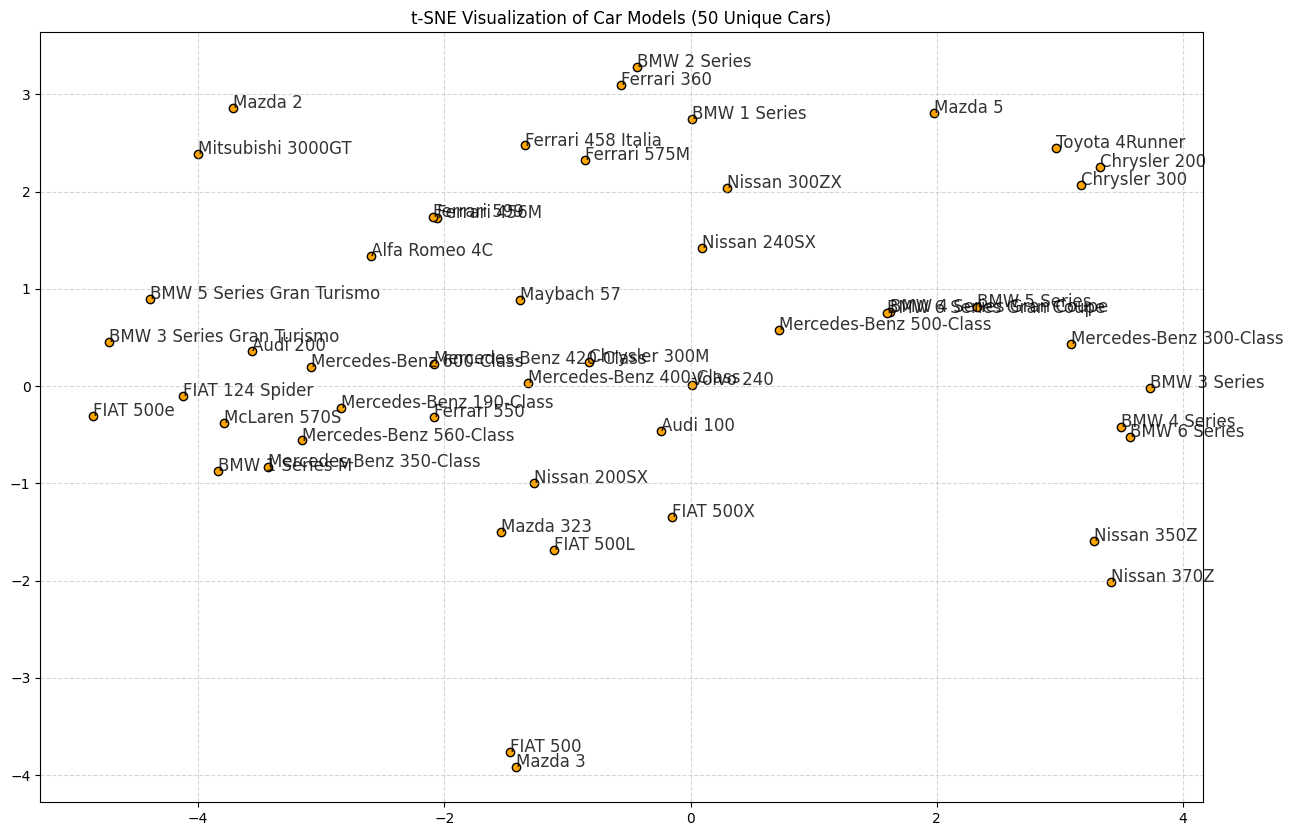

In [25]:

unique_cars = df_cars['Maker_Model'].unique()[:50]
X = model.wv.__getitem__(unique_cars)

# Perform t-SNE reduction
tsne_model = TSNE(perplexity=20, n_components=2, init="pca", n_iter=1000, random_state=100)
Y = tsne_model.fit_transform(X)

# Plotting the t-SNE results
plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1], c='orange', edgecolors='k')

# Annotate the points with car names
for i, car in enumerate(unique_cars):
    plt.annotate(car, (Y[i, 0], Y[i, 1]), fontsize=12, alpha=0.8)

plt.title('t-SNE Visualization of Car Models (50 Unique Cars)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()